## Step 5: Model Evaluation & Comparison

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import pandas as pd
import joblib 

# Load your data
Customer_Churn = pd.read_csv(r'D:\Bank_Churn_Project\data\processed_data.csv') 

X = Customer_Churn.drop(columns=['Exited'], axis=1)  # adjust as needed
y = Customer_Churn['Exited']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Objective:**  
Evaluate all trained models on the test set and compare their performance using metrics and ROC curves to identify the best model.

**Actions:**  
1. Load trained models  
2. Generate predictions on the test set  
3. Compute evaluation metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC  
4. Plot combined ROC curve to visually compare models

In [17]:
# Load Saved Models
import joblib

models = {
    'Logistic Regression': joblib.load(open(r'D:\Bank_Churn_Project\models\logistic_regression.pkl', 'rb')),
    'Random Forest': joblib.load(open(r'D:\Bank_Churn_Project\models\random_forest.pkl', 'rb')),
    'XGBoost': joblib.load(open(r'D:\Bank_Churn_Project\models\xgboost.pkl', 'rb'))
}

print("All models loaded successfully!")


All models loaded successfully!


## Evaluate Models 

In [21]:
metrics = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })

metrics_Customer_Churn = pd.DataFrame(metrics)
metrics_Customer_Churn  # Display comparison table

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.9990,0.997455,0.997455,0.997455,0.999395
1,Random Forest,0.9995,1.000000,0.997455,0.998726,0.998440
2,XGBoost,0.9995,1.000000,0.997455,0.998726,0.997764



### Plot combined ROC curve

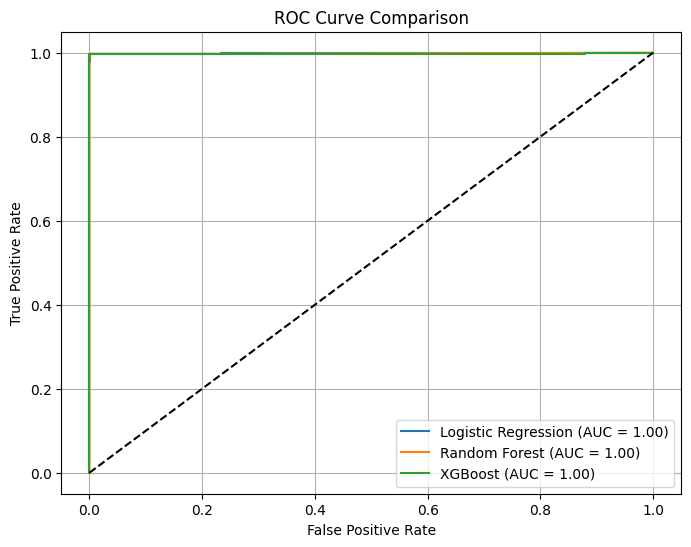

In [22]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()